In [4]:
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import requests
import time
import csv
import matplotlib.pyplot as plt
import numpy as np
#from prettytable import PrettyTable
import sqlite3


In [59]:
con = sqlite3.connect('my1.db') #создали соединение с БД
cur = con.cursor() #курсор, по строкам будет ходить

def create_table_student():
    cur.execute('CREATE TABLE IF NOT EXISTS student (vk_id INT NOT NULL, name VARCHAR(45) NOT NULL, home_town VARCHAR(45) NOT NULL, PRIMARY KEY (vk_id), CONSTRAINT fk_student_student_sex  FOREIGN KEY (name) REFERENCES student_sex (student_name) ON DELETE NO ACTION ON UPDATE NO ACTION)')

def create_table_student_sex():
    cur.execute('CREATE TABLE IF NOT EXISTS student_sex (student_name VARCHAR(45) NOT NULL, student_sex VARCHAR(45) NULL, PRIMARY KEY (student_name))')    
    

def data_entry(value):    
    cur.execute('INSERT INTO student (vk_id, name, home_town) VALUES(?, ?, ?)',value)
    con.commit()

def data_entry_sex(value):    
    cur.execute('INSERT or IGNORE INTO student_sex (student_name, student_sex) VALUES(?, ?)',value)
    con.commit()

create_table_student()
create_table_student_sex()
    
        
def user_parser (j, id, sex):
    if sex==1:
        sex1='female'
    else:
        sex1='male'  
    url = "https://api.vk.com/method/users.get.xml?user_ids="+id[1:]+"&fields=home_town"
    r = requests.get(url)
    page = BeautifulSoup(r.text, 'html.parser')
    try: #(number, url, id, home_town, name, sex)
        answer = (str(j), id, page.uid.get_text(), page.home_town.get_text(), page.first_name.get_text(), sex1)
    except AttributeError:
        answer = (str(j), id, page.uid.get_text(), 'Error', page.first_name.get_text(), sex1)
    try:
        if answer[3]!='Error':
            data_entry((answer[2],answer[4],answer[3]))
            data_entry_sex((answer[4],answer[5]))
    except UnicodeEncodeError:
        answer = (str(j), id, page.uid.get_text(), 'Error', page.first_name.get_text(), sex1)
        if answer[3]!='Error':
            data_entry((answer[2],answer[4],answer[3]))
            data_entry_sex((answer[4],answer[5]))
    time.sleep(0.33)

In [60]:
ua = UserAgent()
print(ua.chrome)
header = {'User-Agent':str(ua.chrome)}
print(header)

Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17'}


In [61]:
j=0
bdate=17

while bdate<=25:
    sex=1
    while sex<=2:
        i=1
        while i<=48:
            if i==0:
                url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset=0"
            else:
                url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset="+str(20+i*20)
            r=requests.get(url, headers=header)
            print(r.ok)
            page = BeautifulSoup(r.text, 'html.parser')
            #print(page.prettify())
            tags=page.findAll("div", {"class":"labeled name"})
            #print (tags)
            print('Page', i+1)
            for tag in tags:
                some=tag.findAll("a", {"class": None})
                for link in some:
                    j=j+1
                    print (j,')' ,link.get('href'))
                    user_parser(j, link.get('href'), sex)
            i=i+1
            time.sleep(0.33)
        sex=sex+1
    bdate=bdate+1
cur.close()
con.close()

True
Page 2
1 ) /id25676529
2 ) /snezzzhana
3 ) /nastya_stausy
4 ) /losseella
5 ) /belyakovamaria
6 ) /feykina
7 ) /lakmanito21
8 ) /id351690564
9 ) /id255127441
True
Page 3
10 ) /j_uli
11 ) /katerina.vasilyeva99
12 ) /id223057105
13 ) /id202045634
14 ) /officepluse
15 ) /arina_abramova1
16 ) /id185691616
17 ) /id184385630
18 ) /ksenmaria
19 ) /polina.chirkova
20 ) /astarto
21 ) /id145699182
22 ) /your_mom_so_hot
True
Page 4
23 ) /klassen_anna
24 ) /id98035245
25 ) /evallins
26 ) /id52029721
27 ) /maiorovavalerya
28 ) /sedovakatya
29 ) /irina.grigorieva
30 ) /id15567930
31 ) /id1116757
32 ) /id180561585
33 ) /makaroooosh
34 ) /ulchanfox
35 ) /ppppffffffffff
True
Page 5
36 ) /bascheva
37 ) /romanchuk.anastasia
38 ) /annakazmina29
39 ) /id50333890
40 ) /arbllbr
41 ) /id3837386
42 ) /mvnams
43 ) /alissd
True
Page 6
44 ) /id195225202
45 ) /yulikkkk
46 ) /dashkarah
47 ) /alyonavolf
48 ) /kenzoo17
49 ) /duck_my_sick
50 ) /id139844559
51 ) /dashuleka01
52 ) /nancy_vorobeva
53 ) /mila_fo
54 ) 

KeyboardInterrupt: 

In [37]:
path = "Home_Town.csv"
users = []
cities = []
with open(path, "r", newline="") as file:
    reader = csv.reader(file)
    i=0
    for row in reader:
        if row[3] == "Error" or row[3] == '':
            i=i
        elif i==0:
            users.append(row)
            #print(row)
            i = i + 1
        else:
            row[0]=i
            users.append(row)
            #print(row)
            i=i+1
Num_people=len(users)
for j in range(len(users)):
    if          users[j][3] == 'Санкт - Петербург' or \
                users[j][3] == 'Санкт Петербург' or\
                users[j][3] == 'СПб' or\
                users[j][3] == 'Питер' or\
                users[j][3] == 'Saint-Petersburg' or \
                users[j][3] == 'Петербург' or \
                users[j][3] == 'Санкт-петербург' or \
                users[j][3] == 'Санкт- Петербург' or \
                users[j][3] == 'Санкт-Петербург ' or\
                users[j][3] == 'санкт-петербург':
        cities.append('Санкт-Петербург')
    else:
        cities.append(users[j][3])
c=list(set(cities))

for i in range(len(c)):  #считаем города, которые встречаются один раз, мусором и статистически не важными. Удаляем мусор
    if cities.count(c[i])==1:
        cities.remove(c[i])
c=list(set(cities))

c1=[]
calc=[]
for i in range(len(c)):
    c1.append(cities.count(c[i]))
for i in range(len(c)):
    calc.append([c1[i],c[i]])
calc.sort(reverse=True)
print(calc)

[[1251, 'Санкт-Петербург'], [21, 'Норильск'], [21, 'Мурманск'], [19, 'Уфа'], [18, 'Екатеринбург'], [17, 'Челябинск'], [16, 'Тольятти'], [16, 'Сургут'], [16, 'Северодвинск'], [15, 'Череповец'], [15, 'Архангельск'], [14, 'Петрозаводск'], [13, 'Краснодар'], [13, 'Владивосток'], [11, 'Хабаровск'], [11, 'Набережные Челны'], [11, 'Москва'], [11, 'Колпино'], [11, 'Брянск'], [11, 'Барнаул'], [10, 'Якутск'], [10, 'Уральск'], [10, 'Сыктывкар'], [10, 'Самара'], [10, 'Омск'], [10, 'Магнитогорск'], [10, 'Костанай'], [10, 'Кемерово'], [9, 'Ставрополь'], [9, 'Сочи'], [9, 'Смоленск'], [9, 'Оренбург'], [9, 'Мирный'], [9, 'Калининград'], [9, 'Гатчина'], [9, 'Выборг'], [9, 'Великий Новгород'], [9, 'Saint-P'], [9, 'Cанкт-Петербург'], [8, 'Торжок'], [8, 'Тихвин'], [8, 'СПБ'], [8, 'Петропавловск-Камчатский'], [8, 'Нижневартовск'], [8, 'Донецк'], [8, 'Великие Луки'], [8, 'Алматы'], [7, 'Ярославль'], [7, 'Ухта'], [7, 'Псков'], [7, 'Пермь'], [7, 'Орск'], [7, 'Новосибирск'], [7, 'Новокузнецк'], [7, 'Красноярск'

In [96]:
cur.execute('SELECT COUNT(1) FROM student')
str_vsego = cur.fetchall()
vsego = str_vsego.pop(0)[0]
print('Число анализируемых пользователей =',vsego)

###получили списки для осей
#def graph_data():
cur.execute('SELECT home_town FROM student GROUP BY home_town')
data_town = cur.fetchall()
#print(data_town)
cur.execute('SELECT COUNT(home_town) FROM student GROUP BY home_town')
data_value = cur.fetchall()
#print(data_value)   
towns = []
values = []
values_percent=[]
b = 0
while b<len(data_town):
    towns.append(data_town.pop(b)[0])
    values.append(data_value.pop(b)[0])
    values_percent.append(values.pop(b)*100/vsego)
    
print(towns)
print(values_percent)
###
cur.execute('SELECT COUNT(1) FROM student_sex WHERE student_sex = "male"')
datam = cur.fetchall()   
cur.execute('SELECT COUNT(1) FROM student_sex WHERE student_sex = "female"')
dataf = cur.fetchall()
print('boys =',datam.pop(0)[0],'girls =',dataf.pop(0)[0]) 

Число анализируемых пользователей = 76
['', 'London', 'Актюбинск', 'Александров', 'Архангельск', 'Балхаш', 'Владивосток', 'Волгоград', 'Кемерово', 'Ленинград', 'Лянтор', 'Микунь', 'Москва', 'Новороссийск', 'Новочеркасск', 'Орск', 'Пенза', 'Псков', 'Ровенская область Ровенский район улица Ровенская город Ровно', 'Рязань', 'Санкт - Петербург', 'Санкт Петербург', 'Санкт-Петербург', 'Смоленск', 'Снежинск', 'Сургут', 'Талнах', 'Тоцкое 2', 'Улан-Удэ', 'Южно-Сахалинск', 'печоры', 'санкт-петербург']
[35.526315789473685, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 2.6315789473684212, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 1.3157894736842106, 2.6315789473684212, 21.05263157894737, 1.3157894736842106, 1.3157894736842106, 2.6

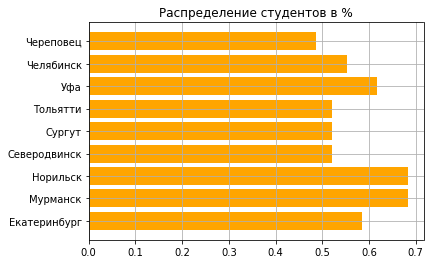

In [70]:
#пока не строим
fig = plt.figure()
axes = fig.add_subplot (1, 1, 1)
plt.barh(city[2:11], city_percent[2:11], align='center', color='orange')
axes.set_xscale ('linear')
plt.title('Распределение студентов в %')
plt.grid(True)   # линии вспомогательной сетки
plt.show()